In [3]:
# advance neuro project

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [27]:
def ReLU(x):
    zeros_mat = np.zeros(x.shape)
    output = np.fmax(x,zeros_mat)
    return output

In [28]:
def ReLU_deriv(x):
    non_negs = np.where(x >= 0)
    output = np.zeros(x.shape)
    output[non_negs] = 1
    return output

In [29]:
def angleCal(A, B):
    num = np.trace(np.matmul(np.conjugate(A.T), B))
    norm_A = math.sqrt(np.trace(np.matmul(A,np.conjugate(A.T))))
    norm_B = math.sqrt(np.trace(np.matmul(B,np.conjugate(B.T))))
    denum = norm_A*norm_B
    angle = np.arccos(num/denum)*180/math.pi
    return angle

In [12]:
#### network parameters - open loop 2 layer network - first condition - auto correlated 

mu = 0
sigma = 1
LR = 0.002
n_b = 100 # batch size
number_of_iterations = 2000


input_layer_size = 20
hidden_layer1_size = 100
output_layer_size = 20

# updating the network parameters
rep = 10
angles1 = np.zeros((rep, number_of_iterations))

for k in range (rep):
    forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
    forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))
    backward_weight_1 = np.random.normal(mu, sigma, size=(output_layer_size,hidden_layer1_size))
    
    # input layer values
    input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) # initial value of inputs - constant during iterations
    error_delta2 = np.random.normal(mu, sigma, size=(n_b, output_layer_size)) # initial value of error_delta 2 - constant during iterations
    error_delta1 = np.matmul(error_delta2, backward_weight_1) # initial value of error_delta1 - constant during iterations since

    
    for j in range (number_of_iterations):
        angles1[k,j] = angleCal(forward_weight_1, backward_weight_1.T)
        Z1 = np.matmul(input_layer, forward_weight_0)
        hidden_layer_1 = ReLU(Z1)
        delta1 = np.multiply(error_delta1,ReLU_deriv(Z1))
        delta_w0 = LR*np.matmul(input_layer.T, delta1)
        delta2 = error_delta2
        delta_w1 = LR*np.matmul(hidden_layer_1.T, delta2)
        forward_weight_0 += delta_w0
        forward_weight_1 += delta_w1
        
print('simulation finished, please run the next section for the result')

simulation finished, please run the next section for the result


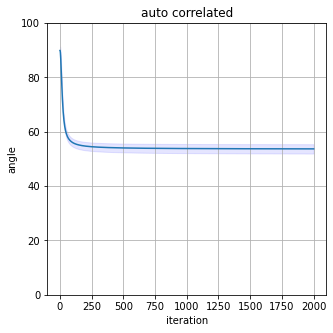

In [6]:
## plot the result of auto correlated mode(prev part's result)

    
fig, ax = plt.subplots(1,1,figsize=(5,5));
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles1,0));
ax.set_ylim([0, 100]);
ax.set_title('auto correlated');
ax.set_ylabel('angle');
ax.set_xlabel('iteration');
ax.grid(True);

# plot the condfidence interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles1,0)-np.std(angles1,axis=0), np.mean(angles1,0)+np.std(angles1,axis=0),\
                color='b', alpha=.1);


In [5]:
#### network parameters - open loop 2 layer network - second condition - cross correlated 

mu = 0
sigma = 1
LR = 0.002
n_b = 100 # batch size
number_of_iterations = 2000


input_layer_size = 20
hidden_layer1_size = 100
output_layer_size = 20

# updating the network parameters
rep = 10
angles2 = np.zeros((rep, number_of_iterations))

for k in range (rep):
    forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
    forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))
    backward_weight_1 = np.random.normal(mu, sigma, size=(output_layer_size,hidden_layer1_size))

    # input layer values
    input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) 
    error_delta2 = np.copy(input_layer) # cross correlated with inputs of network
    error_delta1 = np.matmul(error_delta2, backward_weight_1) 
    
    for j in range (number_of_iterations):
        angles2[k,j] = angleCal(forward_weight_1, backward_weight_1.T)
        Z1 = np.matmul(input_layer, forward_weight_0)
        hidden_layer_1 = ReLU(Z1)
        delta1 = np.multiply(error_delta1,ReLU_deriv(Z1))
        delta_w0 = LR*np.matmul(input_layer.T, delta1)
        delta2 = np.copy(error_delta2)
        delta_w1 = LR*np.matmul(hidden_layer_1.T, delta2)
        forward_weight_0 += delta_w0
        forward_weight_1 += delta_w1
        # generate the parameters again
        input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) 
        error_delta2 = np.copy(input_layer)
        error_delta1 = np.matmul(error_delta2, backward_weight_1) 
        
print('simulation finished, please run the next section for the result')

simulation finished, please run the next section for the result


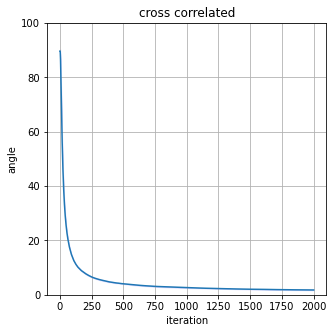

In [6]:
# plot the result of cross correlated mode(prev part's result)

    
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles2,0))
ax.set_ylim([0, 100])
ax.set_title('cross correlated')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)

# plot the condfidence interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles2,0)-np.std(angles2,axis=0), np.mean(angles2,0)+np.std(angles2,axis=0),\
                color='b', alpha=.1);


In [13]:
#### network parameters - open loop 2 layer network - third condition - not auto correlated nor cross correlated

mu = 0
sigma = 1
LR = 0.002
n_b = 100 # batch size
number_of_iterations = 2000


input_layer_size = 20
hidden_layer1_size = 100
output_layer_size = 20

# updating the network parameters
rep = 10
angles3 = np.zeros((rep, number_of_iterations))

for k in range (rep):
    forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
    forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))
    backward_weight_1 = np.random.normal(mu, sigma, size=(output_layer_size,hidden_layer1_size))

    # input layer values
    input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) 
    error_delta2 = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) 
    error_delta1 = np.matmul(error_delta2, backward_weight_1)

    for j in range (number_of_iterations):
        angles3[k,j] = angleCal(forward_weight_1, backward_weight_1.T)
        Z1 = np.matmul(forward_weight_0.T, input_layer.T).T
        hidden_layer_1 = ReLU(Z1)
        delta1 = np.multiply(error_delta1,ReLU_deriv(Z1))
        delta_w0 = LR*np.matmul(input_layer.T, delta1)
        delta2 = error_delta2
        delta_w1 = LR*np.matmul(hidden_layer_1.T, delta2)
        forward_weight_0 += delta_w0
        forward_weight_1 += delta_w1
        # generate the parameters again
        input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) 
        error_delta2 = np.random.normal(mu, sigma, size=(n_b, output_layer_size)) 
        error_delta1 = np.matmul(error_delta2, backward_weight_1) 
        
print('simulation finished, please run the next section for the result')

simulation finished, please run the next section for the result


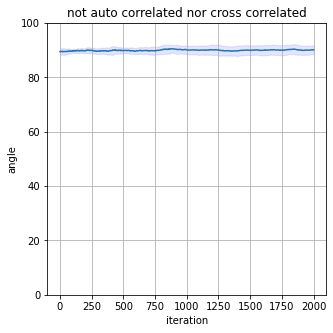

In [14]:
# plot the result of not auto correlated nor cross correlated mode(prev part's result)

    
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles3,0))
ax.set_ylim([0, 100])
ax.set_title('not auto correlated nor cross correlated')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)

# plot the condfidence interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles3,0)-np.std(angles3,axis=0), np.mean(angles3,0)+np.std(angles3,axis=0),\
                color='b', alpha=.1);


In [15]:
#### network parameters - open loop 2 layer network - forth condition - auto correlated & cross correlated

mu = 0
sigma = 1
LR = 0.002
n_b = 100 # batch size
number_of_iterations = 2000


input_layer_size = 20
hidden_layer1_size = 100
output_layer_size = 20

# updating the network parameters
rep = 10
angles4 = np.zeros((rep, number_of_iterations))

for k in range (rep):
    forward_weight_0 = np.random.normal(mu, sigma, size=(input_layer_size,hidden_layer1_size))
    forward_weight_1 = np.random.normal(mu, sigma, size=(hidden_layer1_size,output_layer_size))
    backward_weight_1 = np.random.normal(mu, sigma, size=(output_layer_size,hidden_layer1_size))

    # input layer values
    input_layer = np.random.normal(mu, sigma, size=(n_b, input_layer_size)) # initial value of inputs - constant during iterations
    error_delta2 = input_layer # initial value of error_delta 2 - constant during iterations
    error_delta1 = np.matmul(error_delta2, backward_weight_1) # initial value of error_delta1 - constant during iterations since
    # delta 2 doesn't change

    for j in range (number_of_iterations):
        angles4[k,j] = angleCal(forward_weight_1, backward_weight_1.T)
        Z1 = np.matmul(input_layer, forward_weight_0)
        hidden_layer_1 = ReLU(Z1)
        delta1 = np.multiply(error_delta1,ReLU_deriv(Z1))
        delta_w0 = LR*np.matmul(input_layer.T, delta1)
        delta2 = error_delta2
        delta_w1 = LR*np.matmul(hidden_layer_1.T, delta2)
        forward_weight_0 += delta_w0
        forward_weight_1 += delta_w1
        
print('simulation finished, please run the next section for the result')

simulation finished, please run the next section for the result


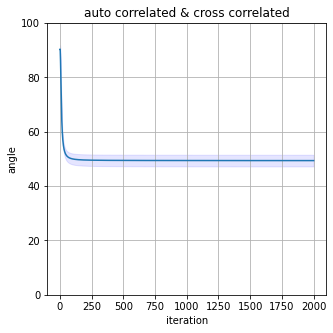

In [16]:
# plot the result of auto correlated & cross correlated mode(prev part's result)

    
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles4,0))
ax.set_ylim([0, 100])
ax.set_title('auto correlated & cross correlated')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)

# plot the condfidence interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles4,0)-np.std(angles4,axis=0), np.mean(angles4,0)+np.std(angles4,axis=0),\
                color='b', alpha=.1);


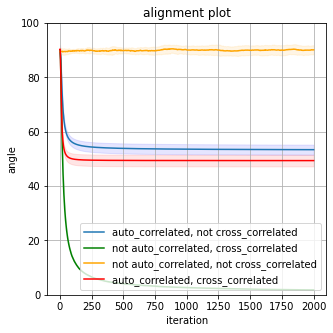

In [17]:
# plot the result of all three conditions together

    
fig, ax = plt.subplots(1,1,figsize=(5,5))

# condition 1
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles1,0))
ax.set_ylim([0, 100])
ax.set_title('alignment plot')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)
# plot the condfidence1 interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles1,0)-np.std(angles1,axis=0), np.mean(angles1,0)+np.std(angles1,axis=0),\
                color='b', alpha=.1);

# condition 2
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles2,0),color='green')
ax.set_ylim([0, 100])
ax.set_title('alignment plot')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)
# plot the condfidence2 interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles2,0)-np.std(angles2,axis=0), np.mean(angles2,0)+np.std(angles2,axis=0),\
                color='green', alpha=.1);

# condition 3
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles3,0),color='orange')
ax.set_ylim([0, 100])
ax.set_title('alignment plot')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)
# plot the condfidence3 interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles3,0)-np.std(angles3,axis=0), np.mean(angles3,0)+np.std(angles3,axis=0),\
                color='orange', alpha=.1);

# condition 4
ax.plot(np.arange(1,number_of_iterations+1),np.mean(angles4,0),color='red')
ax.set_ylim([0, 100])
ax.set_title('alignment plot')
ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.grid(True)
# plot the condfidence4 interval over repeations
ax.fill_between(np.arange(1,number_of_iterations+1),\
                np.mean(angles4,0)-np.std(angles4,axis=0), np.mean(angles4,0)+np.std(angles4,axis=0),\
                color='red', alpha=.1);

ax.legend(['auto_correlated, not cross_correlated','not auto_correlated, cross_correlated',\
           'not auto_correlated, not cross_correlated',\
          'auto_correlated, cross_correlated'],loc='lower right')

In [2]:
# Paper Part - 2.3 Using the provided theoretical tool to investigate FA in the learning process of a practical deep ANN
# train and test a 5 layer network on MNIST
# fact = tanh(ReLU) - 50 neurons in all hidden and output layer - output layer is using 5 hot coding
# images of MNIST should be resized to 15*15 - so we have 225 neurons in input layer 
# inputs should be normalized 
# batch size = 1000, 60 batches available (total numbre of 60K images)
# initialization of forward/ backward weights and biases is done using N(0,0.1)
# loss function is sth like squared error, check page 5 for the details

In [30]:
def n_hot_coder(x,n,hot_labels,output_neuron_num):
    category_num = 10
    if(category_num*n > output_neuron_num):
        print('nhot encoding can`t be done since the condition`s not met')
        return false
    
    output = np.zeros((len(x),output_neuron_num))
    
    output[np.where(x == 0),:] = hot_labels[0,:]
    output[np.where(x == 1),:] = hot_labels[1,:]
    output[np.where(x == 2),:] = hot_labels[2,:]
    output[np.where(x == 3),:] = hot_labels[3,:]
    output[np.where(x == 4),:] = hot_labels[4,:]
    output[np.where(x == 5),:] = hot_labels[5,:]
    output[np.where(x == 6),:] = hot_labels[6,:]
    output[np.where(x == 7),:] = hot_labels[7,:]
    output[np.where(x == 8),:] = hot_labels[8,:]
    output[np.where(x == 9),:] = hot_labels[9,:]

    return output

In [31]:
def loss_function(output_layer,labels):
    difference = labels-output_layer
    output = 0.5*(np.sum(difference**2))
    return output

In [32]:
def tanh_Relu_deriv(x):
    non_negs = np.where(x > 0)
    output = np.zeros(x.shape)
    output[non_negs] = 1-np.tanh(x[non_negs])**2
    return output

In [63]:
def binarize_output(output,n,categories_nhot):
    binarized = np.zeros(output.shape)
    
#     print(output.shape,categories_nhot.shape)
#     n = n # n hot
#     for i in range(len(output)):
#         # find the n max
#         sorted_indices = np.argsort(output[i,:])
#         binarized[i,sorted_indices[-n:]] = 1

    
#     for i in range(len(output)):
#         # match it with the closest label
#         closest_label = -1
#         min_distance = 10000000000
#         for j in range(n):
#             distance = binarized[i,:]-categories_nhot[j,:]
#             cal_distnace = np.sum(distance**2)
#             if(cal_distnace <= min_distance): # keep the best label
#                 min_distance = np.copy(cal_distnace) # change the min distance
#                 closest_label = np.copy(j)
#         if(min_distance < np.ceil(n/2)):
#             binarized[i,:] = np.copy(categories_nhot[closest_label,:])

    for i in range(len(output)):
        current_data_scores = np.matmul(output[i,:],categories_nhot.T)
        sorted_indices = np.argsort(current_data_scores)
        closest_label = sorted_indices[-1]
        binarized[i,:] = categories_nhot[closest_label,:]
    
        
        
    return binarized

In [34]:
def accuracy_cal(output,label):
    acc = 0
    for i in range(len(output)): 
        if(sum(output[i,:] == label[i,:]) == output.shape[1]):
            acc += 1
  
    acc = acc/len(output)*100 # in percentage
    return acc

In [35]:
def alignment_term_cal(iterations_num,batch_num,layer_num,LR,B1,B2,B3,B4,delta5_inTime,delta4_inTime,delta3_inTime,\
                      delta2_inTime,delta1_inTime,input_layer,hidden_layer1_inTime,hidden_layer2_inTime,\
                      hidden_layer3_inTime,hidden_layer4_inTime):

    alignment_terms = [];
    
    
    # cal alignment terms
    for i in range(1,iterations_num*batch_num): # iteration
        print(i)
        o = 0
        alignment_terms_k = np.zeros((i,layer_num,output_layer_size,output_layer_size))
        while (o < i):
            # l1
            term1 = np.matmul(B1.T,delta2_inTime[i-o-1,:,:].T)
            term2 = np.matmul(input_layer[np.mod(i-o-1,batch_num),:,:],input_layer[np.mod(i,batch_num),:,:].T)
            term3 = delta2_inTime[i,:,:]
            term4 = np.matmul(term1,term2)
            alignment_terms_k[o,0,:,:] = (LR**2)*np.matmul(term4,term3)
            # l2
            term1 = np.matmul(B2.T,delta3_inTime[i-o-1,:,:].T)
            term2 = np.matmul(hidden_layer1_inTime[i,:,:],hidden_layer1_inTime[i,:,:].T)
            term3 = delta3_inTime[i,:,:]
            term4 = np.matmul(term1,term2)
            alignment_terms_k[o,1,:,:] = (LR**2)*np.matmul(term4,term3)
            # l3
            term1 = np.matmul(B3.T,delta4_inTime[i-o-1,:,:].T)
            term2 = np.matmul(hidden_layer2_inTime[i,:,:],hidden_layer2_inTime[i,:,:].T)
            term3 = delta4_inTime[i,:,:]
            term4 = np.matmul(term1,term2)
            alignment_terms_k[o,2,:,:] = (LR**2)*np.matmul(term4,term3)
            # l4
            term1 = np.matmul(B4.T,delta5_inTime[i-o-1,:,:].T)
            term2 = np.matmul(hidden_layer3_inTime[i,:,:],hidden_layer3_inTime[i,:,:].T)
            term3 = delta4_inTime[i,:,:]
            term4 = np.matmul(term1,term2)
            alignment_terms_k[o,3,:,:] = (LR**2)*np.matmul(term4,term3)
            
            o += 1
        
        alignment_terms.append(alignment_terms_k)
        
    return alignment_terms

In [36]:
# Load MNIST Dataset
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('data loaded!')
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


data loaded!
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [37]:
# resize images to 15*15
import cv2

x_train_resized = np.zeros((x_train.shape[0],15,15))
x_test_resized = np.zeros((x_test.shape[0],15,15))

# resize train images
for i in range (x_train.shape[0]):
    image = np.squeeze(x_train[i,:,:])
    x_train_resized[i,:,:] = cv2.resize(image,(15,15))

    
# resize test images
for i in range (x_test.shape[0]):
    image = np.squeeze(x_test[i,:,:])
    x_test_resized[i,:,:] = cv2.resize(image,(15,15))
    
print('resizing done!')
print(x_train_resized.shape,x_test_resized.shape)


resizing done!
(60000, 15, 15) (10000, 15, 15)


In [38]:
# vectorize images

x_train_flat = x_train_resized.reshape(x_train_resized.shape[0],-1)
x_test_flat = x_test_resized.reshape(x_test_resized.shape[0],-1)
print('vectorization done!')
print(x_train_flat.shape,x_test_flat.shape)

vectorization done!
(60000, 225) (10000, 225)


In [39]:
# normalize images

x_tr_norm = x_train_flat/255
x_te_norm  = x_test_flat/255

print('normalization done!')

normalization done!


In [40]:
# n hot coding the labels
category_num = 10
output_neuron_num = 50
n = int(output_neuron_num/category_num)

# encoding the categroies
categories_nhot = np.zeros((category_num,output_neuron_num))
codes = random.sample(range(output_neuron_num), output_neuron_num)
for i in range(category_num):
    categories_nhot[i,codes[i*n:(i+1)*n]] = 1 
    
y_train_nhot = n_hot_coder(y_train,n,categories_nhot,output_neuron_num)
y_test_nhot = n_hot_coder(y_test,n,categories_nhot,output_neuron_num)

print('n hot coding done!')
print(y_train_nhot.shape, y_test_nhot.shape)

n hot coding done!
(60000, 50) (10000, 50)


In [64]:
# create the network weights and biases from N(0,0.1)
mu = 0
sigma = 0.1

# each layer size
input_layer_size = 225
hidden_layer1_size = 50
hidden_layer2_size = 50
hidden_layer3_size = 50
hidden_layer4_size = 50
output_layer_size = 50

# forward weights
w0 = np.random.normal(mu,sigma,size=(input_layer_size,hidden_layer1_size))
w1 = np.random.normal(mu,sigma,size=(hidden_layer1_size,hidden_layer2_size))
w2 = np.random.normal(mu,sigma,size=(hidden_layer2_size,hidden_layer3_size))
w3 = np.random.normal(mu,sigma,size=(hidden_layer3_size,hidden_layer4_size))
w4 = np.random.normal(mu,sigma,size=(hidden_layer4_size,output_layer_size))

# backward weights
B4 = np.random.normal(mu,sigma,size=(output_layer_size,hidden_layer4_size))
B3 = np.random.normal(mu,sigma,size=(hidden_layer4_size,hidden_layer3_size))
B2 = np.random.normal(mu,sigma,size=(hidden_layer3_size,hidden_layer2_size))
B1 = np.random.normal(mu,sigma,size=(hidden_layer2_size,hidden_layer1_size))

# bias vectors
b1 =  np.random.normal(mu,sigma,size=(1,hidden_layer1_size))
b2 =  np.random.normal(mu,sigma,size=(1,hidden_layer2_size))
b3 =  np.random.normal(mu,sigma,size=(1,hidden_layer3_size))
b4 =  np.random.normal(mu,sigma,size=(1,hidden_layer4_size))
b5 =  np.random.normal(mu,sigma,size=(1,output_layer_size))

print('network parameters created!')

network parameters created!


In [65]:
import pandas as pd

# run the network - run prev part to initialize the paramters each time

LR = 0.0008
batch_size = 1000
batch_num = 60
layer_num = 4
im_size = 15*15
input_layer = x_tr_norm.reshape((batch_num,batch_size,im_size))
iterations_num = 100
accuracy_training = np.zeros((batch_num,iterations_num))
loss_training = np.zeros((batch_num,iterations_num))

# angle between B & W
alignment = np.zeros((4,batch_num,iterations_num))


# layer and delta values in iterations for calculating alignment terms
hidden_layer1_inTime = np.zeros((iterations_num*batch_num,batch_size,hidden_layer1_size))
hidden_layer2_inTime = np.zeros((iterations_num*batch_num,batch_size,hidden_layer2_size))
hidden_layer3_inTime = np.zeros((iterations_num*batch_num,batch_size,hidden_layer3_size))
hidden_layer4_inTime = np.zeros((iterations_num*batch_num,batch_size,hidden_layer4_size))
output_layer_inTime = np.zeros((iterations_num*batch_num,batch_size,output_layer_size))
delta5_inTime = np.zeros((iterations_num*batch_num,batch_size,output_layer_size))
delta4_inTime = np.zeros((iterations_num*batch_num,batch_size,hidden_layer4_size))
delta3_inTime = np.zeros((iterations_num*batch_num,batch_size,hidden_layer3_size))
delta2_inTime = np.zeros((iterations_num*batch_num,batch_size,hidden_layer2_size))
delta1_inTime = np.zeros((iterations_num*batch_num,batch_size,hidden_layer1_size))




for j in range(iterations_num):
    for i in range(batch_num):
        # forward
        z1 = np.matmul(input_layer[i,:,:],w0) + b1
        hidden_layer1 = np.tanh(ReLU(z1))
        # hidden_layer1_inTime[j*batch_num+i,:,:] = hidden_layer1
        z2 = np.matmul(hidden_layer1,w1) + b2
        hidden_layer2 = np.tanh(ReLU(z2))
        # hidden_layer2_inTime[j*batch_num+i,:,:] = hidden_layer2
        z3 = np.matmul(hidden_layer2,w2) + b3
        hidden_layer3 = np.tanh(ReLU(z3))
        # hidden_layer3_inTime[j*batch_num+i,:,:] = hidden_layer3
        z4 = np.matmul(hidden_layer3,w3) + b4
        hidden_layer4 = np.tanh(ReLU(z4))
        # hidden_layer4_inTime[j*batch_num+i,:,:] = hidden_layer4
        z5 = np.matmul(hidden_layer4,w4) + b5
        output_layer = np.tanh(ReLU(z5))
        # output_layer_inTime[j*batch_num+i,:,:] = output_layer
        
        # backward the error
        E = y_train_nhot[i*batch_size:(i+1)*batch_size,:]-output_layer
        delta5 = np.multiply(E,tanh_Relu_deriv(z5))
        # delta5_inTime[j*batch_num+i,:,:] = delta5
        delta4 = np.multiply(np.matmul(delta5,B4),tanh_Relu_deriv(z4))
        # delta4_inTime[j*batch_num+i,:,:] = delta4
        delta3 = np.multiply(np.matmul(delta4,B3),tanh_Relu_deriv(z3))
        # delta3_inTime[j*batch_num+i,:,:] = delta3
        delta2 = np.multiply(np.matmul(delta3,B2),tanh_Relu_deriv(z2))
        # delta2_inTime[j*batch_num+i,:,:] = delta2
        delta1 = np.multiply(np.matmul(delta2,B1),tanh_Relu_deriv(z1))
        # delta1_inTime[j*batch_num+i,:,:] = delta1
        
        # update forward weights 
        w4 += LR*np.matmul(hidden_layer4.T,delta5)
        w3 += LR*np.matmul(hidden_layer3.T,delta4)
        w2 += LR*np.matmul(hidden_layer2.T,delta3)
        w1 += LR*np.matmul(hidden_layer1.T,delta2)
        w0 += LR*np.matmul(input_layer[i,:,:].T,delta1)
        
        # update biases
        J = np.ones((1,batch_size))
        b5 += np.squeeze(LR*np.matmul(J,delta5))
        b4 += np.squeeze(LR*np.matmul(J,delta4))
        b3 += np.squeeze(LR*np.matmul(J,delta3))
        b2 += np.squeeze(LR*np.matmul(J,delta2))
        b1 += np.squeeze(LR*np.matmul(J,delta1))
        
        # binarize output
        n = 5 # n hot
        output_layer_binarized = binarize_output(output_layer,n,categories_nhot)

        # loss values
        loss_training[i,j] = loss_function(output_layer,y_train_nhot[i*batch_size:(i+1)*batch_size,:])
        accuracy_training[i,j] = accuracy_cal(output_layer_binarized,y_train_nhot[i*batch_size:(i+1)*batch_size,:]);
        
        # cal the angle between B & W
        alignment[0,i,j] = angleCal(w1,B1.T)
        alignment[1,i,j] = angleCal(w2,B2.T) 
        alignment[2,i,j] = angleCal(w3,B3.T) 
        alignment[3,i,j] = angleCal(w4,B4.T) 
    
    print(np.mean(accuracy_training[:,j]),np.mean(loss_training[:,j]))

print('network training done!')

20.253333333333334 2249.150095389251
44.83833333333333 1940.5575347419249
68.2 1591.342345292379
74.40000000000002 1413.2857637013662
77.10833333333332 1320.3197976245235
79.01333333333334 1257.0987598688087
80.72833333333332 1180.0652919778104
82.10333333333332 1125.1112369150899
83.04500000000002 1071.24648533504
83.925 1042.1031704046825
84.73833333333332 1009.6061043198308
85.42666666666668 964.8866741940365
85.96166666666667 944.4991292004015
86.39166666666665 928.6380627466596
86.74333333333334 915.494385207028
86.98333333333335 896.8594893091127
87.31333333333333 863.9205851866026
87.535 851.9325653441288
87.72 842.058159228777
87.94999999999999 833.3631301636084
88.10166666666666 825.2873092615007
88.29666666666667 817.8783595002187
88.485 811.0343536578655
88.65999999999998 804.7482831553294
88.78333333333333 798.7582786493217
88.92999999999999 792.9713484093483
89.05500000000002 787.3671936958857
89.21166666666666 782.2199672663616
89.33666666666666 777.3259806575029
89.45833

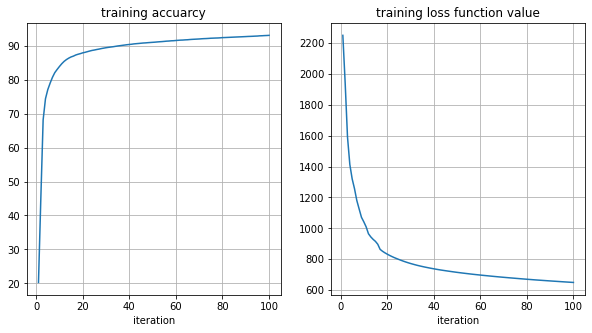

In [66]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(np.arange(1,iterations_num+1),np.mean(accuracy_training,axis=0))
ax[1].plot(np.arange(1,iterations_num+1),np.mean(loss_training,axis=0))
ax[0].set_title('training accuarcy')
ax[0].set_xlabel('iteration')
ax[1].set_title('training loss function value')
ax[1].set_xlabel('iteration')
ax[0].grid(True)
ax[1].grid(True)

In [67]:
import pandas as pd

# accuracy on test data

batch_size = 1
batch_num = int(x_te_norm.shape[0]/batch_size)
im_size = 15*15
input_layer = x_te_norm.reshape((batch_num,batch_size,im_size))
accuracy_training = np.zeros((batch_num))
loss_training = np.zeros((batch_num))

for i in range(batch_num):
    # forward
    z1 = np.matmul(input_layer[i,:,:],w0) + b1
    hidden_layer1 = np.tanh(ReLU(z1))
    z2 = np.matmul(hidden_layer1,w1) + b2
    hidden_layer2 = np.tanh(ReLU(z2))
    z3 = np.matmul(hidden_layer2,w2) + b3
    hidden_layer3 = np.tanh(ReLU(z3))
    z4 = np.matmul(hidden_layer3,w3) + b4
    hidden_layer4 = np.tanh(ReLU(z4))
    z5 = np.matmul(hidden_layer4,w4) + b5
    output_layer = np.tanh(ReLU(z5))

    # binarize output
    n = 1
    output_layer_binarized = binarize_output(output_layer,n,categories_nhot)
    
    # loss val and accuracy
    loss_training[i] = loss_function(output_layer_binarized,y_test_nhot[i*batch_size:(i+1)*batch_size,:])
    accuracy_training[i] = accuracy_cal(output_layer_binarized,y_test_nhot[i*batch_size:(i+1)*batch_size,:]);

print('accuracy: ',np.mean(accuracy_training),' | loss value: ', np.mean(loss_training))
print('done!')

accuracy:  93.16  | loss value:  0.342
done!


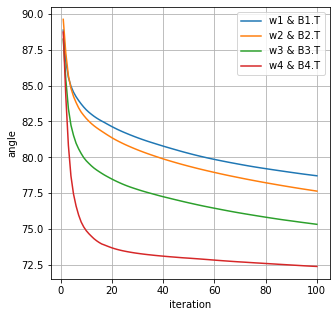

In [68]:
# angle between backward weights and forward weights
fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(np.arange(1,iterations_num+1),np.mean(alignment[0,:,:],axis=0))
ax.plot(np.arange(1,iterations_num+1),np.mean(alignment[1,:,:],axis=0))
ax.plot(np.arange(1,iterations_num+1),np.mean(alignment[2,:,:],axis=0))
ax.plot(np.arange(1,iterations_num+1),np.mean(alignment[3,:,:],axis=0))


ax.set_ylabel('angle')
ax.set_xlabel('iteration')
ax.legend(['w1 & B1.T','w2 & B2.T','w3 & B3.T','w4 & B4.T'],loc='best')
ax.grid(True)

In [91]:
# alignment terms calculation

batch_size = 1000
batch_num = 60
layer_num = 4
im_size = 15*15
iterations_num = 1
input_layer = x_tr_norm.reshape((batch_num,batch_size,im_size))
a = alignment_term_cal(iterations_num,batch_num,layer_num,LR,B1,B2,B3,B4,delta5_inTime,delta4_inTime,delta3_inTime,\
                      delta2_inTime,delta1_inTime,input_layer,hidden_layer1_inTime,hidden_layer2_inTime,\
                      hidden_layer3_inTime,hidden_layer4_inTime)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [108]:
# cal angles between alignment terms and backwart weights.T
angles_alignment_terms = np.zeros((len(a),4))

T_k = a[-1]
for i in range(T_k.shape[0]):
    T_o = np.squeeze(T_k[i,:,:,:])
    angles_alignment_terms[i,0] = angleCal(T_o[0,:,:],B1.T)
    angles_alignment_terms[i,1] = angleCal(T_o[1,:,:],B2.T)
    angles_alignment_terms[i,2] = angleCal(T_o[2,:,:],B3.T)
    angles_alignment_terms[i,3] = angleCal(T_o[3,:,:],B4.T)


(59, 4)


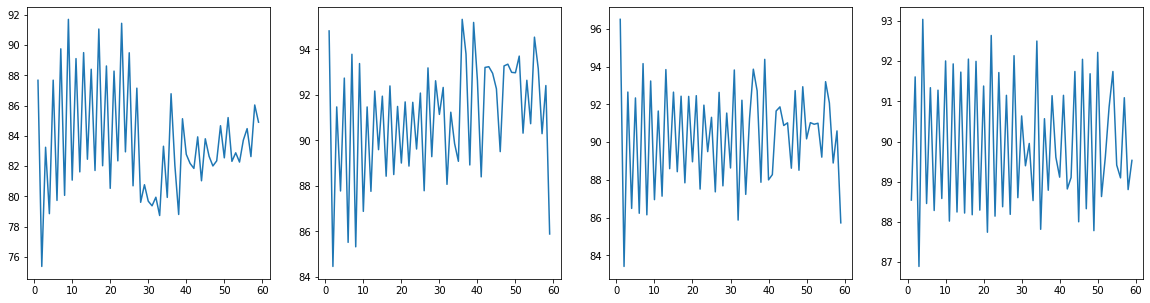

In [113]:
print(angles_alignment_terms.shape)
fig, ax = plt.subplots(1,4,figsize=(20,5))

ax[0].plot(np.arange(1,60),angles_alignment_terms[:,0])
ax[1].plot(np.arange(1,60),angles_alignment_terms[:,1])
ax[2].plot(np.arange(1,60),angles_alignment_terms[:,2])
ax[3].plot(np.arange(1,60),angles_alignment_terms[:,3])

